In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [2]:
# 얼리스탑핑 쉽게
def model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, patience):
    save_file_name = model_name
    cb_checkpoint,cb_earlystopping = checkpoint_ez(MODEL_SAVE_FOLDER_PATH, save_file_name, patience)
    return cb_checkpoint,cb_earlystopping

def checkpoint_ez(MODEL_SAVE_FOLDER_PATH,save_file_name, patience) : 
    MODEL_SAVE_FOLDER_PATH = MODEL_SAVE_FOLDER_PATH
    data_name = save_file_name
    model_path = MODEL_SAVE_FOLDER_PATH + data_name + '.hdf5'
    # val_loss 값이 낮아졌을(좋아졌을) 때만 저장
    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                    verbose=1, save_best_only=True
                                   )
    cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience = patience, verbose=1,
                                                  mode='auto', baseline=None, restore_best_weights=False)
    return cb_checkpoint, cb_earlystopping

# 그래프 쉽게
def loss_graph(label1,label2,bottom,top):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label=label1)
    loss_ax.plot(history.history['val_loss'], 'r', label=label2)
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    # acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    loss_ax.set_ylim(bottom,top)
    return plt.show()

# 모델 저장 def
def json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name):
    # model save by json
    # load model 
    model = keras.models.load_model(MODEL_SAVE_FOLDER_PATH +file_name+ '.hdf5')
    # Save model with json format
    model_json = model.to_json()
    with open(MODEL_SAVE_FOLDER_PATH+file_name+'.json', "w") as json_file:
        json_file.write(model_json)
    # Save weight with h5 format
    model.save_weights( MODEL_SAVE_FOLDER_PATH +file_name +'.h5')
    return print("Saved model to disk : "+ file_name +'.h5')


In [3]:
data = pd.read_csv('../9.데이터/mnist/mnist_train_small.csv', header=None)
data = np.array(data)

x_train = data[:, 1:]
y_train = data[:, 0]

x_train = x_train.reshape(x_train.shape[0],28,28)
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train)

data_test = pd.read_csv('../9.데이터/mnist/mnist_test.csv', header=None)
data_test = np.array(data_test)

x_test = data_test[:, 1:]
y_test = data_test[:, 0]
x_test = x_test.reshape(x_test.shape[0],28,28)
x_test_in = np.expand_dims(x_test, -1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 596,042
Trainable params: 596,042
Non-trainable params: 0
________________________________________________

Epoch 26/100
211/219 [===========================>..] - ETA: 0s - loss: 0.0270 - accuracy: 0.9934
Epoch 00026: val_loss did not improve from 0.09163
219/219 [==============================] - 1s 5ms/step - loss: 0.0261 - accuracy: 0.9936 - val_loss: 0.1708 - val_accuracy: 0.9732
Epoch 27/100
212/219 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9957
Epoch 00027: val_loss did not improve from 0.09163
219/219 [==============================] - 1s 5ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.1413 - val_accuracy: 0.9788
Epoch 28/100
212/219 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979
Epoch 00028: val_loss did not improve from 0.09163
219/219 [==============================] - 1s 5ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.1461 - val_accuracy: 0.9788
Epoch 29/100
216/219 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9988
Epoch 00029: val_loss did not improve from 0.09163
219/219 [==

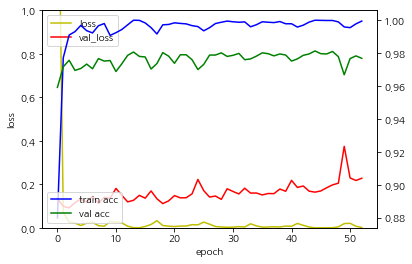

Saved model to disk : test.h5


In [8]:
model_name = 'test'
MODEL_SAVE_FOLDER_PATH = '../2.모델저장'
cb_checkpoint,cb_earlystopping = model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, 50)

model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.3, callbacks=[cb_checkpoint,cb_earlystopping])
loss_graph('loss','val_loss',0,1)


# 모델 저장
MODEL_SAVE_FOLDER_PATH = '../2.모델저장/'
file_name = model_name
json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name)